# MODELIZACIÓN PARA NO SUPERVISADO

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
directorio = r"C:/Users/DataScience/PROYECTOS_ML/leadscoring/02_Datos/03_Trabajo"

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [4]:
# Crear la ruta correctamente
ruta = os.path.join(directorio, nombre_df)

# Cargar el archivo pickle
df = pd.read_pickle(ruta)

print("Archivo cargado correctamente.")

Archivo cargado correctamente.


In [5]:
df.head(10).T

id,660737,660728,660727,660719,660681,660680,660673,660664,660624,660616
origen_API,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00
origen_Landing Page Submission,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
origen_Lead Add Form,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
origen_OTROS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fuente_Chat,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
fuente_Direct Traffic,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
fuente_Google,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
fuente_OTROS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fuente_Organic Search,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fuente_Reference,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
"fuente_Chat",
             "fuente_Direct Traffic",
                  "fuente_Google",
                  "fuente_OTROS",
                  "fuente_Organic Search",
                  "fuente_Reference",

IndentationError: unexpected indent (1233321286.py, line 2)

In [11]:
df.drop(columns =["ambito_Banking, Investment And Insurance",
                  "ambito_Business Administration",
                  "ambito_Finance Management",
                  "ambito_Healthcare Management",
                  "ambito_Human Resource Management",
                  "ambito_IT Projects Management",
                  "ambito_International Business",
                  "ambito_Marketing Management",
                  "ambito_Media and Advertising",
                  "ambito_OTROS",
                  "ambito_Operations Management",
                  "ambito_Select",
                  "ambito_Supply Chain Management",
                  "ambito_Travel and Tourism",
                  "descarga_lm_No",
                  "descarga_lm_Yes",
                  "visitas_total_mms",
                  "score_actividad_mms",
                  "score_perfil_mms"
                  ]
                    , inplace =True)

KeyError: "['ambito_Healthcare Management', 'visitas_total_mms'] not found in axis"

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5122 entries, 660737 to 579533
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   origen_API                             5122 non-null   float64
 1   origen_Landing Page Submission         5122 non-null   float64
 2   origen_Lead Add Form                   5122 non-null   float64
 3   origen_OTROS                           5122 non-null   float64
 4   fuente_Chat                            5122 non-null   float64
 5   fuente_Direct Traffic                  5122 non-null   float64
 6   fuente_Google                          5122 non-null   float64
 7   fuente_OTROS                           5122 non-null   float64
 8   fuente_Organic Search                  5122 non-null   float64
 9   fuente_Reference                       5122 non-null   float64
 10  ult_actividad_Chat Conversation        5122 non-null   float64
 11  ul

## MODELIZAR

### Reservar el dataset de validacion

### Crear el espacio de soluciones

In [99]:
min_k = 3
max_k = 6

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [100]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [101]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [102]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,8875.70,0.20,1064.12,1.92
4,8182.81,0.21,913.79,1.76
5,7556.65,0.22,847.99,1.72


#### Analizar los gráficos

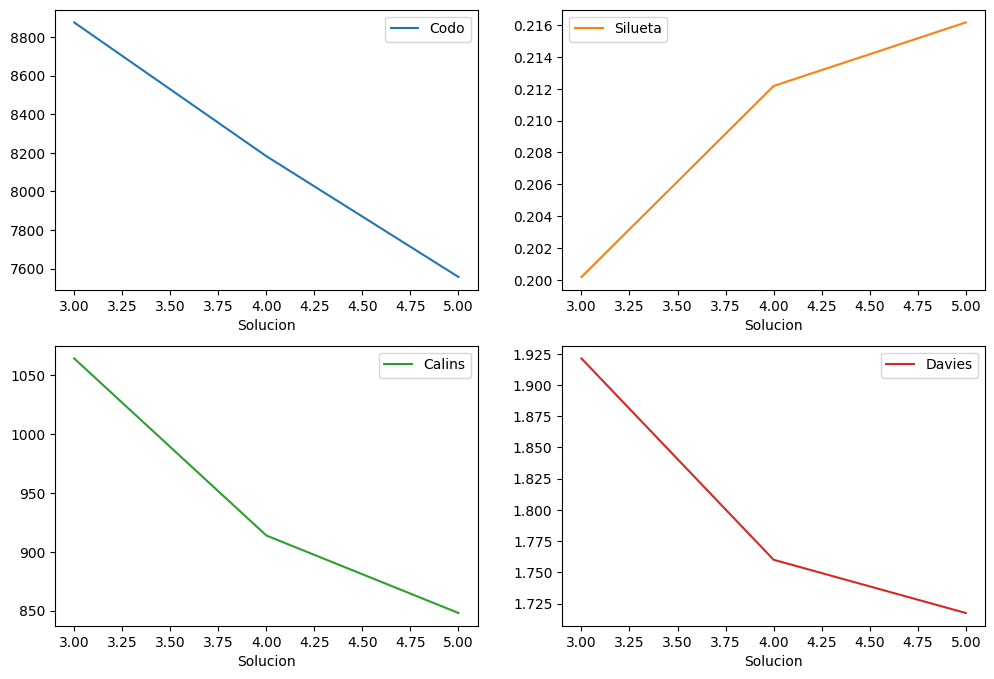

In [103]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

### Segmentación final con la mejor solucion

In [104]:
# Segun datos voy a probar con las mejores soluciones de 3 y 4.
mejor_solucion = 4

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=4, n_init=10)

## EVALUAR

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [105]:
df['segmento'] = cluster.predict(df)

## PERFILAR LOS SEGMENTOS

In [106]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'green', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3
origen_API,0.000000,0.000000,0.977169,0.151986
origen_Landing Page Submission,1.000000,1.000000,0.000000,0.421416
origen_Lead Add Form,0.000000,0.000000,0.002609,0.417962
origen_OTROS,0.000000,0.000000,0.020222,0.008636
fuente_Chat,0.000000,0.000000,0.196999,0.046632
fuente_Direct Traffic,0.000000,1.000000,0.046314,0.210708
fuente_Google,0.706571,0.000000,0.484671,0.196891
fuente_OTROS,0.015615,0.000000,0.071755,0.048359
fuente_Organic Search,0.277814,0.000000,0.200261,0.110535
fuente_Reference,0.000000,0.000000,0.000000,0.386874


In [91]:
df.segmento.value_counts(normalize=True)

segmento
0   0.32
1   0.29
3   0.23
2   0.16
Name: proportion, dtype: float64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5122 entries, 660737 to 579533
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   origen_API                             5122 non-null   float64
 1   origen_Landing Page Submission         5122 non-null   float64
 2   origen_Lead Add Form                   5122 non-null   float64
 3   origen_OTROS                           5122 non-null   float64
 4   ult_actividad_Chat Conversation        5122 non-null   float64
 5   ult_actividad_Converted to Lead        5122 non-null   float64
 6   ult_actividad_Email Link Clicked       5122 non-null   float64
 7   ult_actividad_Email Opened             5122 non-null   float64
 8   ult_actividad_OTROS                    5122 non-null   float64
 9   ult_actividad_Page Visited on Website  5122 non-null   float64
 10  ult_actividad_SMS Sent                 5122 non-null   float64
 11  oc